## Using the ARIMA Model

ARIMA stands for AutoRegressive Integrated Moving Average.
It is a time series forecasting model that uses autocorrelation to model structures within the time series data to predict future values.
Autoregression measures the dependency of a particular sample with a few past observations.

ARIMA model consists of three parameters: p, d and q.   
* p is the number of lagged (or past) observations to consider for autoregression.
* d is the number of times the raw observations are differenced to make the time series stationary.
* q is the size of the moving average window.

The predicted values depend on a weighted linear combination of its past values.

#describe the model a bit more.




Applications of the ARIMA model: for predicting future values and identify fluctuations in data over a period of time. e.g., for seven-day weather forecasting.


Determining if the ARIMA model is the right model to use:
If the past values in your data affect the current or future values and if they could be used to foretell future trends based on recent fluctuations, then time-series forecasting is the solution for such a regression problem.

Some models (such as the one we demonstrated previously using Skforecaster) use purely statistical quantities that often incorporate trends from historical data which may not be relevant in the present or future values. These assumptions, though valid, often fail in real life. 

ARIMA's autoregressive and moving-average approach is used to model stationary time-series data. TIt evaluates the importance of past fluctuations, includes overall trends and smoothens the effect of outliers and temporary abnormal changes in the data.

In this project, we will use the statsmodel library of Python to implement the ARIMA model. The TSA sub-module of statsmodel provides an implementation of the ARIMA model as statsmodel.tsa.arima_model.ARIMA


(url: https://www.projectpro.io/article/how-to-build-arima-model-in-python/544#:~:text=Model%20in%20Python%3F-,ARIMA%20Model%2D%20Complete%20Guide%20to%20Time%20Series%20Forecasting%20in%20Python,data%20to%20predict%20future%20values.)

In [72]:
!pip install pmdarima

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
skforecast 0.5.1 requires statsmodels<=0.13,>=0.12, but you have statsmodels 0.13.2 which is incompatible.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.22.4 which is incompatible.



  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
  Attempting uninstall: packaging
    Found existing installation: packaging 21.0
    Uninstalling packaging-21.0:
      Successfully uninstalled packaging-21.0
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

# autocorrelation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#ADF test
from statsmodels.tsa.stattools import adfuller
#ARIMA model
from statsmodels.tsa.arima_model import ARIMA
#Auto ARIMA
import pmdarima as pm

ModuleNotFoundError: No module named 'pmdarima'

In [2]:
# fixing the size of figures
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':80})

# Loading the data from CSV

In [3]:
covid_df_CE_Inpatient = pd.read_csv('covid_df_CE_Inpatient.csv', parse_dates=['x'])
covid_df_CE_Inpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   x       552 non-null    datetime64[ns]
 1   y       552 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.8 KB


In [4]:
covid_df_CE_Inpatient.head()

,x,y
0,2020-08-04,24.0
1,2020-08-05,24.0
2,2020-08-06,24.0
3,2020-08-07,24.0
4,2020-08-08,26.0


In [5]:
covid_df_CE_Inpatient.tail()

,x,y
547,2022-02-02,6631.0
548,2022-02-03,6703.0
549,2022-02-04,6773.0
550,2022-02-05,6875.0
551,2022-02-06,6965.0


[Text(0.5, 1.0, 'ICU Inpatient - Central East')]

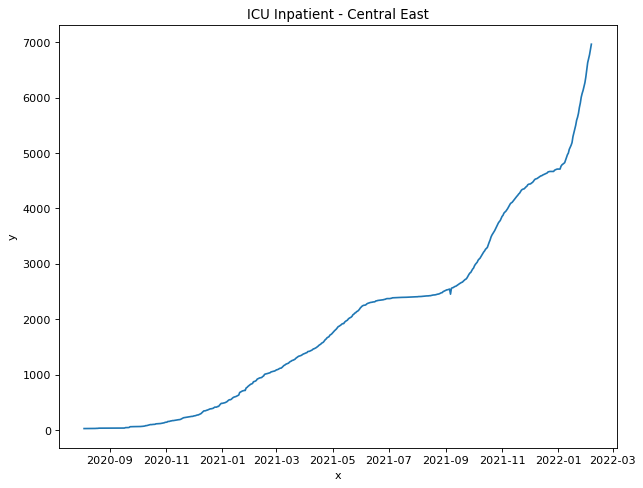

In [22]:
#Visualizing the data

sns.lineplot(x="x", y="y",legend = 'full' , data=covid_df_CE_Inpatient).set(title='ICU Inpatient - Central East')

# Choosing the parameters p,d and q

## 1. Choosing d

### Plotting the autocorrelation function

In [6]:
#adding a new index in order to plot curve
#covid_CE_Inpatient_ind = covid_df_CE_Inpatient.reset_index()

#dropping date column
#covid_CE_Inpatient_nodate = covid_CE_Inpatient_ind.drop('x', axis=1)

#print(covid_CE_Inpatient_nodate.head())

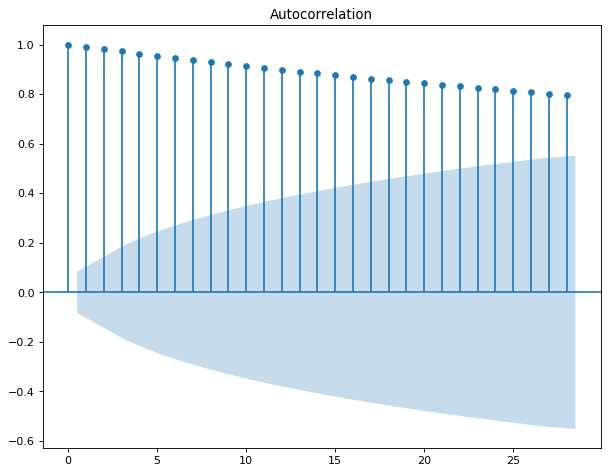

In [7]:
#Checking the order of differencing by checking the autocorrelation plot using the statsmodel package.
plot_acf(covid_df_CE_Inpatient['y'])
plt.show()

In [8]:
data = covid_df_CE_Inpatient

In [9]:
data.head()

,x,y
0,2020-08-04,24.0
1,2020-08-05,24.0
2,2020-08-06,24.0
3,2020-08-07,24.0
4,2020-08-08,26.0


### Using the differencing segment to make the data stationary

#### i) Differencing and displaying the results graphically

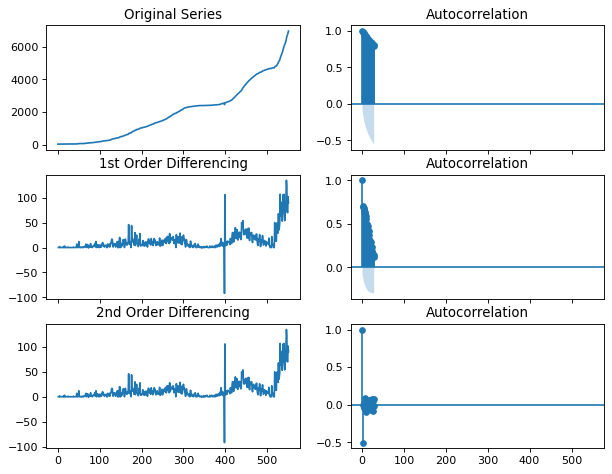

In [10]:
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(data.y); axes[0, 0].set_title('Original Series')
plot_acf(data.y, ax=axes[0, 1])

# 1st Order Differencing
axes[1, 0].plot(data.y.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(data.y.diff().dropna(), ax=axes[1, 1])

# 2nd Order Differencing
axes[2, 0].plot(data.y.diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(data.y.diff().diff().dropna(), ax=axes[2, 1])
plt.show()

#### ii) Checking if the series is stationary using the Augmented Dickey Fuller (ADF) test (adfuller()), from the statsmodels package.

We need differencing only if the series is non-stationary; otherwise, no differencing is needed, that is, d=0.
The ADF test calculates the p-value and compares it with a threshold value or significance level of 0.05. If the p-value is less than this level, then the data is stationary; else, the differencing order is incremented by one.

In [11]:
# Original Series
result = adfuller(data.y.dropna())
print("---1st Order Differencing---")
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

# 1st Order Differencing
result1 = adfuller(data.y.diff().dropna())
print("---2nd Order Differencing---")
print('ADF Statistic: %f' % result1[0])
print('p-value: %f' % result1[1])
print('Critical Values:')
for key, value in result1[4].items():
  print('\t%s: %.3f' % (key, value))

# 2nd Order Differencing
result2 = adfuller(data.y.diff().diff().dropna())
print("---2nd Order Differencing---")
print('ADF Statistic: %f' % result2[0])
print('p-value: %f' % result2[1])
print('Critical Values:')
for key, value in result2[4].items():
  print('\t%s: %.3f' % (key, value))

# 3rd Order Differencing
result3 = adfuller(data.y.diff().diff().diff().dropna())
print("---3rd Order Differencing---")
print('ADF Statistic: %f' % result3[0])
print('p-value: %f' % result3[1])
print('Critical Values:')
for key, value in result3[4].items():
  print('\t%s: %.3f' % (key, value))


---1st Order Differencing---
ADF Statistic: 1.567838
p-value: 0.997758
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570
---2nd Order Differencing---
ADF Statistic: 1.765124
p-value: 0.998277
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570
---2nd Order Differencing---
ADF Statistic: -7.111981
p-value: 0.000000
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570
---3rd Order Differencing---
ADF Statistic: -12.055500
p-value: 0.000000
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


##### Observation:   
After 2nd order differencing, the p-value is extremely small. Thus this series is very likely to be stationary. We will consider “d” as 2 and see how the model performs.

<AxesSubplot:>

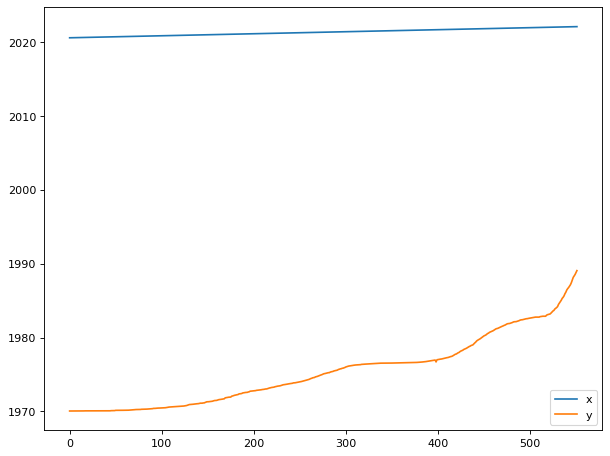

In [12]:
#plotting the data
data.plot()

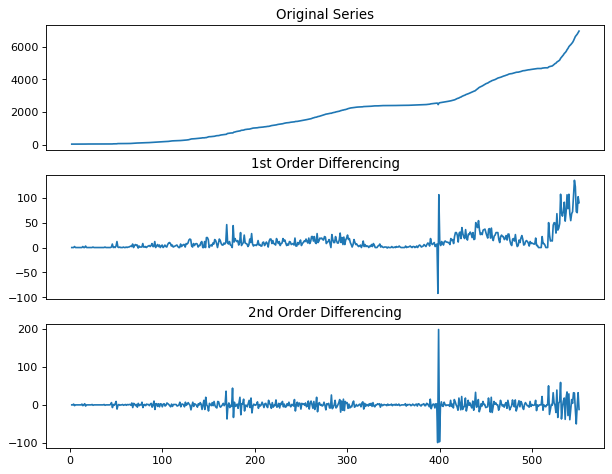

In [13]:
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(data.y); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(data.y.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(data.y.diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

## 2. Choosing p

P is the order for the autoregressive model. 
We can obtain the value of p by inspecting the partial autocorrelation plot, which measures the correlation between the time-series data and a certain lag. 
Based on the presence or absence of correlation, we can determine whether the lag or order is needed or not.

We will determine p based on the most significant lag in the _partial autocorrelation plot_. We will will evaluate upto the 2nd order difference and inspect.

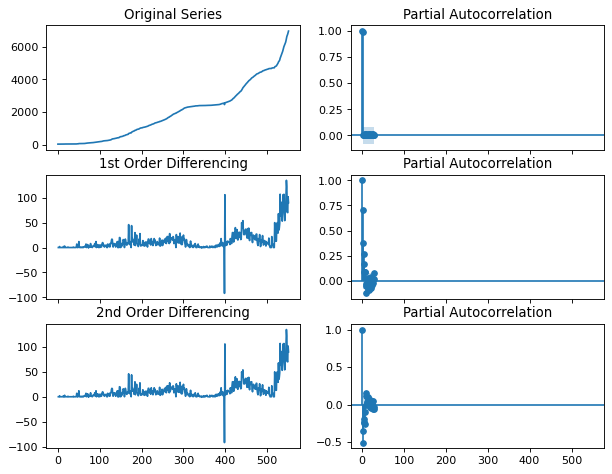

In [14]:
# Original Series
fig1, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(data.y); axes[0, 0].set_title('Original Series')
plot_pacf(data.y, ax=axes[0, 1])

# 1st Order Differencing
axes[1, 0].plot(data.y.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_pacf(data.y.diff().dropna(), ax=axes[1, 1])

# 2nd Order Differencing
axes[2, 0].plot(data.y.diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_pacf(data.y.diff().diff().dropna(), ax=axes[2, 1])
plt.show()

Observation:

The value of p is selected based on how many lags cross the significance limit (blue region) in the PACF plot. 
PACF lag 1 is quite significant since it is well above the significance line. Lag 2 and 3 are significant as well.
We wil pick p=1 tentatively.

## 3. Choosing $q$

The order of the MA term (q) is obtained by looking at the error of the lagged forecast in the ACF plot.
The ACF tells how many MA terms are required to remove any autocorrelation in the stationarized series.

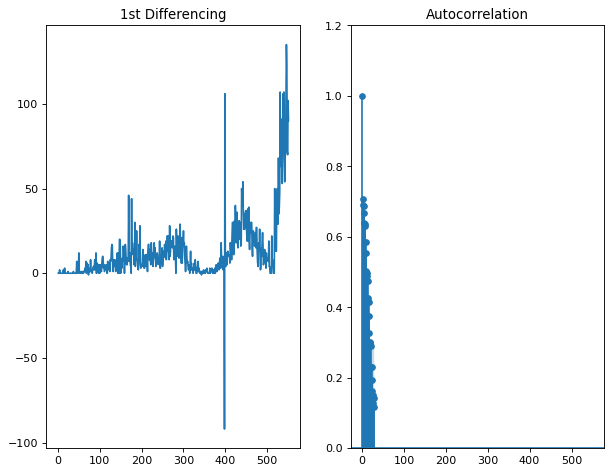

In [15]:
fig, axes = plt.subplots(1, 2, sharex=True)

# 1st Order Differencing
axes[0].plot(data.y.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
#axes[1].set(xlim=('2019-08-02','2023-02-06'))
plot_acf(data.y.diff().dropna(), ax=axes[1])

plt.show()

Observation:
    
Several lags are above the significance line. We will tentatively fix q as 2.

# Building the ARIMA Model

Using the statsmodel package and determined values of p, d and q.

In [16]:
import warnings

warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA', FutureWarning)

In [25]:
#order=(p =1, d=2, q=2)

# 1,1,2 ARIMA Model
model = ARIMA(data.y, order=(1,2,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  550
Model:                 ARIMA(1, 2, 2)   Log Likelihood               -2071.363
Method:                       css-mle   S.D. of innovations             10.439
Date:                Tue, 25 Oct 2022   AIC                           4152.726
Time:                        07:00:23   BIC                           4174.276
Sample:                             2   HQIC                          4161.147
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1765      0.148      1.189      0.234      -0.114       0.467
ar.L1.D2.y     0.8018      0.060     13.374      0.000       0.684       0.919
ma.L1.D2.y    -1.7668      0.042    -41.841      0.0

C:\Users\jngai\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


## Prediction Using the Trained Model

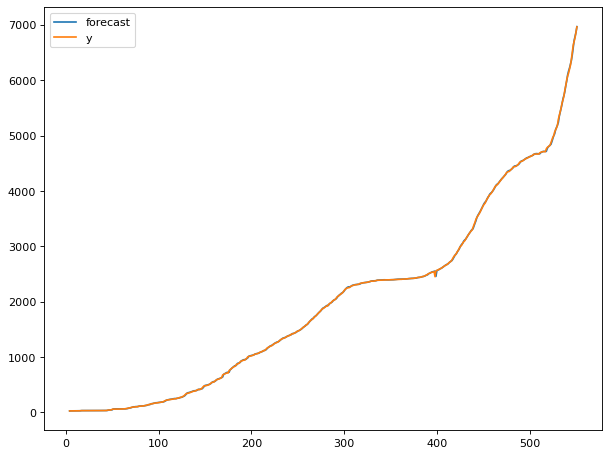

In [23]:
#Predicting using the trained model
model_fit.plot_predict(dynamic=False)
plt.show()

# Evaluating the Model's Performance

In [28]:
#Splitting the data into train-test samples.
#Using the 80-20 split for training and test data respectively.

arima_model = ARIMA(data.y[:442], order=(1,2,2))
model1 = arima_model.fit()
print(model1.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  440
Model:                 ARIMA(1, 2, 2)   Log Likelihood               -1577.686
Method:                       css-mle   S.D. of innovations              8.708
Date:                Tue, 25 Oct 2022   AIC                           3165.371
Time:                        07:08:44   BIC                           3185.805
Sample:                             2   HQIC                          3173.432
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0727      0.053      1.360      0.174      -0.032       0.177
ar.L1.D2.y     0.3619      0.119      3.052      0.002       0.130       0.594
ma.L1.D2.y    -1.5420      0.098    -15.663      0.0

C:\Users\jngai\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [52]:
model1.predict(dynamic=False)
plt.show()

In [35]:
#print array
y_pred = pd.Series(model.forecast(110)[0], index=data.y[442:].index)
y_true = data.y[442:]

print(np.array(y_pred))
print(np.array(y_true))

[3450.92081889 3479.77811156 3510.83032945 3542.72332472 3574.96700177
 3607.38398435 3639.91007613 3672.52204307 3705.21147626 3737.97533232
 3770.81250981 3803.72261007 3836.70548883 3869.76109387 3902.88940629
 3936.09041926 3969.3641303  4002.7105385  4036.12964356 4069.62144535
 4103.18594382 4136.82313897 4170.53303079 4204.31561927 4238.17090441
 4272.09888622 4306.09956469 4340.17293983 4374.31901163 4408.5377801
 4442.82924523 4477.19340702 4511.63026548 4546.1398206  4580.72207239
 4615.37702084 4650.10466595 4684.90500773 4719.77804617 4754.72378128
 4789.74221305 4824.83334148 4859.99716658 4895.23368834 4930.54290677
 4965.92482186 5001.37943361 5036.90674203 5072.50674711 5108.17944886
 5143.92484727 5179.74294235 5215.63373409 5251.59722249 5287.63340756
 5323.74228929 5359.92386768 5396.17814274 5432.50511447 5468.90478285
 5505.3771479  5541.92220962 5578.539968   5615.23042304 5651.99357475
 5688.82942312 5725.73796816 5762.71920986 5799.77314822 5836.89978325
 5874.0

In [69]:
len(y_pred), len(y_true)

(110, 110)

## Plotting Residual Errors

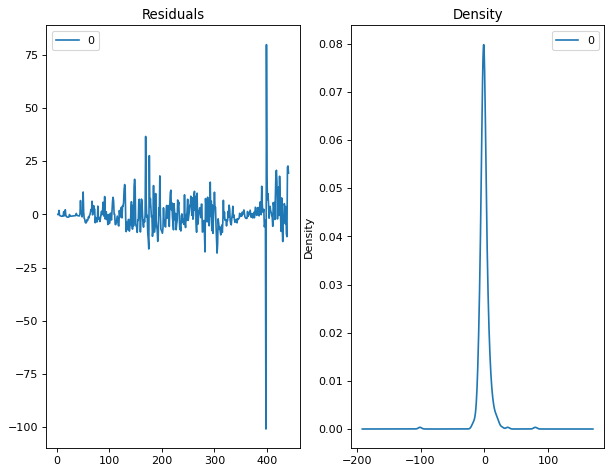

In [67]:
# Plot residual errors
residuals = pd.DataFrame(model1.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [ ]:
Observation:
    
The residual errors have zero mean and uniform variance, which is good.

## Measuring the Performance : RMSE, MAE, MPE and MAPE

* root mean squared (RMSE)   
* mean absolute error (MAE)   
* mean percentage error (MPE)   
* mean absolute percentage error (MAPE)   
* correlation coefficient (to measure similarity)   
* min-max error.

In [66]:
mape = np.mean(np.abs(y_pred - y_true)/np.abs(y_true))
mae = np.mean(np.abs(y_pred - y_true))
mpe = np.mean((y_pred - y_true)/y_true)
rmse = np.mean((y_pred - y_true)**2)**.5
corr = np.corrcoef(y_pred, y_true)[0,1]

print("mape: ",mape)
print("mae: ", mae)
print("mpe: ", mpe)
print("rmse: ", rmse)
print("corr: ", corr)

mape:  0.1296232538771009
mae:  643.2082563163536
mpe:  0.1278398702940679
rmse:  807.9936020217532
corr:  0.9316767321321454


**Conclusion:**
    
    1. There is a high correlation between predicted values of y and actual values of y, with y in this case being the numbeer of ICU hospitalizations.


In [ ]:
#conclude

In [ ]:
#compare the ARIMA,previous math one